In [6]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.8 MB/s 
     |████████████████████████████████| 1.1 MB 33.3 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=472305d0590a14e955a1aebb83040c000cdbbd27559f2106f2bb965ec6aaebad
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=e59832039834b8adb983226951f3d2e6f235c3c6d7c03b78810e53c2a1540095
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


#**Load Data**

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
df = pd.read_csv('./drive/MyDrive/AI/Material Informatics (MI)/Polymer Cloud Point QSAR/Binary Polymer Solution Cloud Point Data/Data/Training_data(MF_MF_full data).csv')
df

,1,64,80,170,175,226,247,341,356,389,...,799*,896*,709*,Mw(Da),PDI,ϕ,w,P(Mpa),1-Phase,CP(°C)
0,1,3,1,1,2,2,1,1,1,1,...,0,0,0,17500,1.06,0.11406,0.15000,82.81,1,21.34
1,1,3,1,1,2,2,1,1,1,1,...,0,0,0,17500,1.06,0.18196,0.23366,80.00,1,21.18
2,1,3,1,1,2,2,1,1,1,1,...,0,0,0,78800,1.12,0.00632,0.00700,0.10,1,73.99
3,1,3,1,1,2,2,1,1,1,1,...,0,0,0,22100,1.03,0.11401,0.15300,1.02,1,27.42
4,1,3,1,1,2,2,1,1,1,1,...,0,0,0,13500,1.06,0.17990,0.17990,4.35,1,6.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4828,0,0,3,0,0,2,1,0,0,0,...,0,0,0,50000,1.50,0.44220,0.50560,0.10,0,63.14
4829,0,0,3,0,0,2,1,0,0,0,...,0,0,0,50000,1.50,0.09225,0.11590,0.10,0,71.08
4830,0,0,3,0,0,2,1,0,0,0,...,0,0,0,50000,1.50,0.11156,0.13940,0.10,0,72.63
4831,0,0,3,0,0,2,1,0,0,0,...,0,0,0,50000,1.50,0.34850,0.40830,0.10,0,73.50


In [9]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [10]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
X_reduced_pca = pca.fit_transform(X)


# t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
X_reduced_tsne = tsne.fit_transform(X)


# UMAP
import umap
from scipy.sparse.csgraph import connected_components

umap = umap.UMAP(n_components=2, random_state=0)
X_reduced_umap = umap.fit_transform(X)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


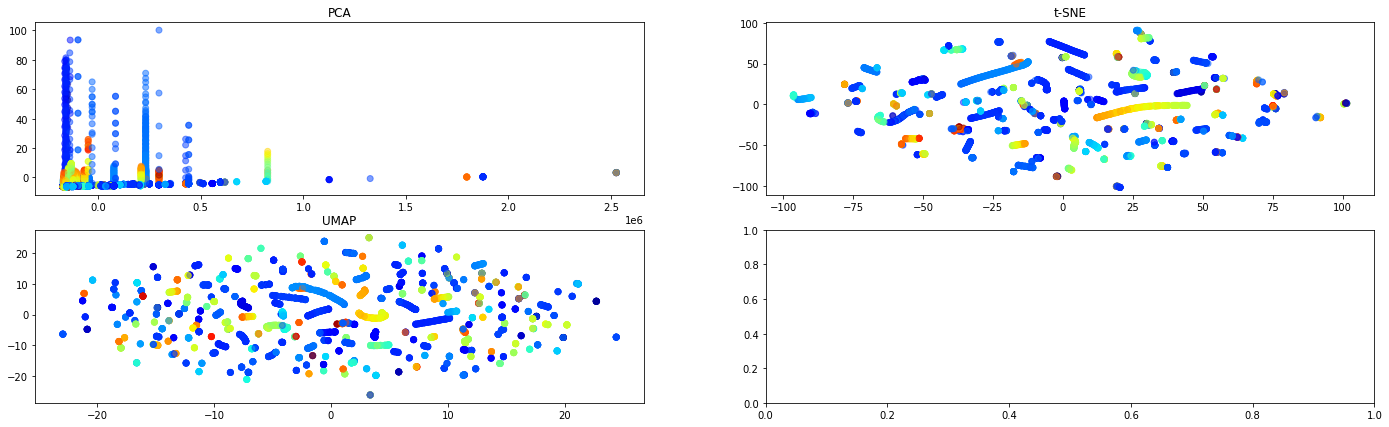

In [16]:
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(24, 7))

ax1.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1],
            c=y, cmap='jet', alpha=0.5)
ax2.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1],
            c=y, cmap='jet', alpha=0.5)
ax3.scatter(X_reduced_umap[:, 0], X_reduced_umap[:, 1],
            c=y, cmap='jet', alpha=0.5)

ax1.set_title("PCA")
ax2.set_title("t-SNE")
ax3.set_title("UMAP")

plt.show()

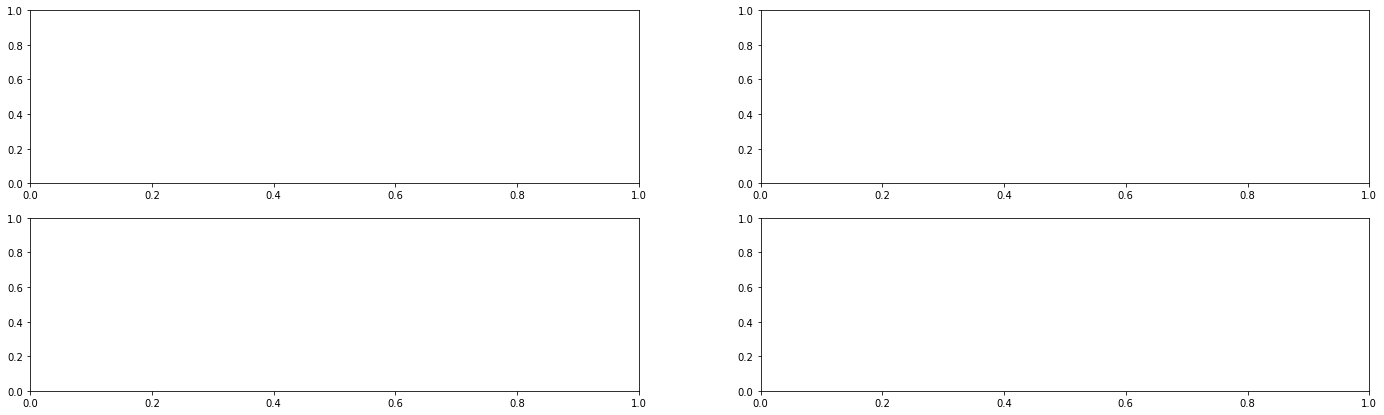

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(24, 7))

In [21]:
ax
#Axes objects of each subplot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2802e60ac0>,
      dtype=object)

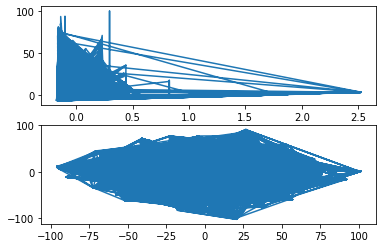

In [23]:
plt.figure(1)
plt.subplot(211)
plt.plot(X_reduced_pca[:, 0], X_reduced_pca[:, 1])

plt.subplot(212)
plt.plot(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1])
plt.show()